In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_s=pd.read_csv("salary.csv",parse_dates=["DOJ"])
df_s

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [3]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   DOJ       457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [4]:
df_s["DOJ"]=df_s["DOJ"].replace("6-0","06-Sep")
df_s["DOJ"]=df_s["DOJ"].replace("7-0","07-Jan")


In [5]:
df_s['DOJ'] = pd.to_datetime(df_s['DOJ'], format='%d-%b')

In [6]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      457 non-null    object        
 1   Team      457 non-null    object        
 2   Number    457 non-null    int64         
 3   Position  457 non-null    object        
 4   Age       457 non-null    int64         
 5   DOJ       457 non-null    datetime64[ns]
 6   Weight    457 non-null    int64         
 7   College   373 non-null    object        
 8   Salary    446 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 32.3+ KB


In [7]:
df_s=pd.DataFrame(data=df_s)
df_s

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,1900-02-06,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,1900-06-06,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,1900-05-06,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,1900-05-06,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,1900-10-06,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,1900-10-06,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,1900-03-06,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,1900-01-06,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,1900-03-07,256,NaN,2900000.0


In [8]:
df_s['Month']=df_s['DOJ'].dt.month_name()
df_s['Date']=df_s['DOJ'].dt.day
df_s

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary,Month,Date
0,Avery Bradley,Boston Celtics,0,PG,25,1900-02-06,180,Texas,7730337.0,February,6
1,Jae Crowder,Boston Celtics,99,SF,25,1900-06-06,235,Marquette,6796117.0,June,6
2,John Holland,Boston Celtics,30,SG,27,1900-05-06,205,Boston University,NaN,May,6
3,R.J. Hunter,Boston Celtics,28,SG,22,1900-05-06,185,Georgia State,1148640.0,May,6
4,Jonas Jerebko,Boston Celtics,8,PF,29,1900-10-06,231,NaN,5000000.0,October,6
...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,1900-10-06,234,Kentucky,2239800.0,October,6
453,Shelvin Mack,Utah Jazz,8,PG,26,1900-03-06,203,Butler,2433333.0,March,6
454,Raul Neto,Utah Jazz,25,PG,24,1900-01-06,179,NaN,900000.0,January,6
455,Tibor Pleiss,Utah Jazz,21,C,26,1900-03-07,256,NaN,2900000.0,March,7


In [9]:
df_s.drop('DOJ',axis=1,inplace=True)


In [10]:
df_s

,Name,Team,Number,Position,Age,Weight,College,Salary,Month,Date
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337.0,February,6
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117.0,June,6
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,NaN,May,6
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640.0,May,6
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,NaN,5000000.0,October,6
...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,234,Kentucky,2239800.0,October,6
453,Shelvin Mack,Utah Jazz,8,PG,26,203,Butler,2433333.0,March,6
454,Raul Neto,Utah Jazz,25,PG,24,179,NaN,900000.0,January,6
455,Tibor Pleiss,Utah Jazz,21,C,26,256,NaN,2900000.0,March,7


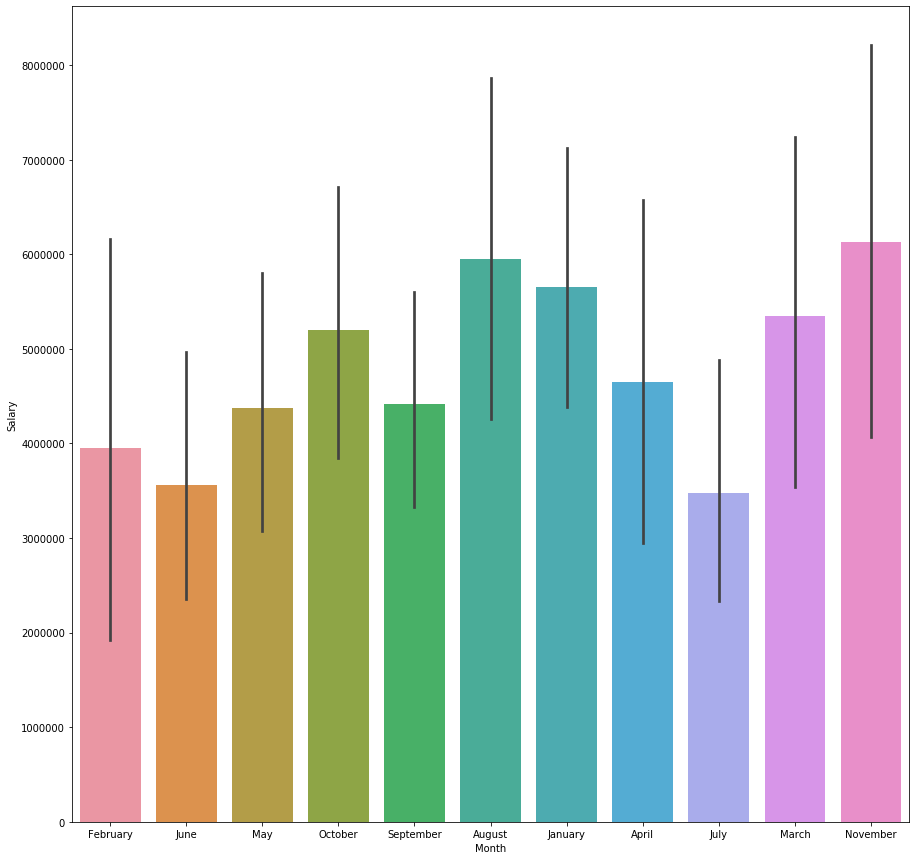

In [11]:
plt.figure(figsize=(15,15))
sns.barplot(x="Month",y="Salary",data=df_s)

In [12]:
df_s.describe(include=object)

,Name,Team,Position,College,Month
count,457,457,457,373,457
unique,457,30,5,118,11
top,Salah Mejri,New Orleans Pelicans,SG,Kentucky,September
freq,1,19,102,22,70


In [13]:
df_s.describe()

,Number,Age,Weight,Salary,Date
count,457.000000,457.000000,457.000000,4.460000e+02,457.000000
mean,17.678337,26.938731,221.522976,4.842684e+06,6.080963
std,15.966090,4.404016,26.368343,5.229238e+06,0.303504
min,0.000000,19.000000,161.000000,3.088800e+04,5.000000
25%,5.000000,24.000000,200.000000,1.044792e+06,6.000000
50%,13.000000,26.000000,220.000000,2.839073e+06,6.000000
75%,25.000000,30.000000,240.000000,6.500000e+06,6.000000
max,99.000000,40.000000,307.000000,2.500000e+07,7.000000


In [14]:
df_s.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Weight       0
College     84
Salary      11
Month        0
Date         0
dtype: int64

In [15]:
df_s.corr()

,Number,Age,Weight,Salary,Date
Number,1.000000,0.028724,0.206921,-0.112386,0.138437
Age,0.028724,1.000000,0.087183,0.213459,-0.022531
Weight,0.206921,0.087183,1.000000,0.138321,0.393402
Salary,-0.112386,0.213459,0.138321,1.000000,0.051034
Date,0.138437,-0.022531,0.393402,0.051034,1.000000


In [16]:
df_s['Salary']=df_s['Salary'].replace(np.NaN,df_s['Salary'].mean())
df_s

,Name,Team,Number,Position,Age,Weight,College,Salary,Month,Date
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7.730337e+06,February,6
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6.796117e+06,June,6
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,4.842684e+06,May,6
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1.148640e+06,May,6
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,NaN,5.000000e+06,October,6
...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,234,Kentucky,2.239800e+06,October,6
453,Shelvin Mack,Utah Jazz,8,PG,26,203,Butler,2.433333e+06,March,6
454,Raul Neto,Utah Jazz,25,PG,24,179,NaN,9.000000e+05,January,6
455,Tibor Pleiss,Utah Jazz,21,C,26,256,NaN,2.900000e+06,March,7


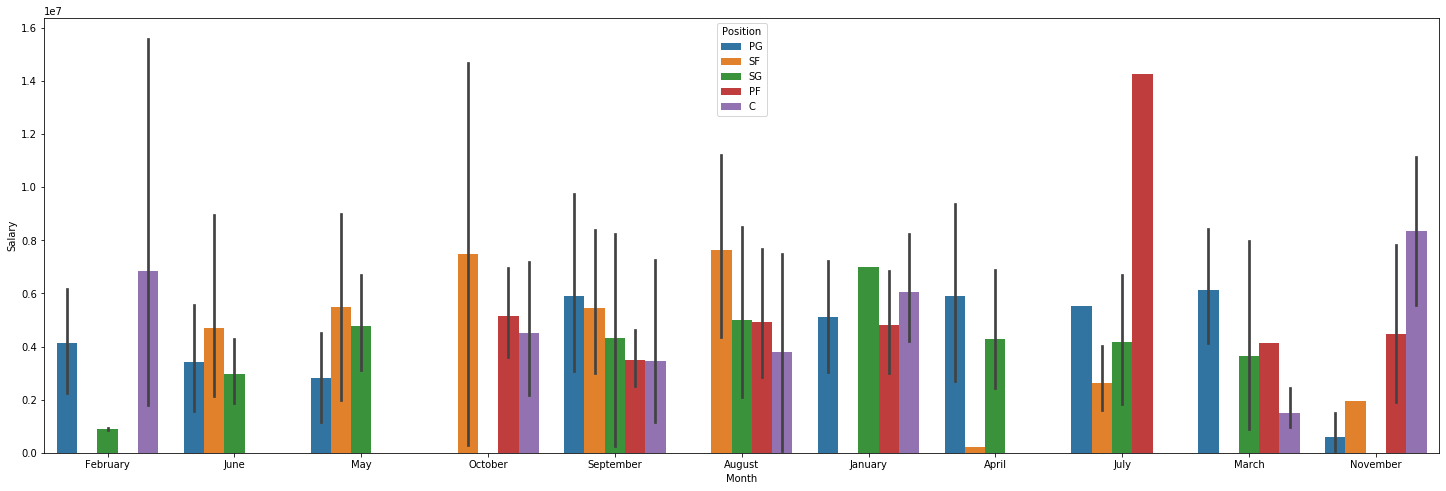

In [17]:
plt.figure(figsize=(25,8))
sns.barplot(x='Month',y='Salary',hue='Position',data=df_s)

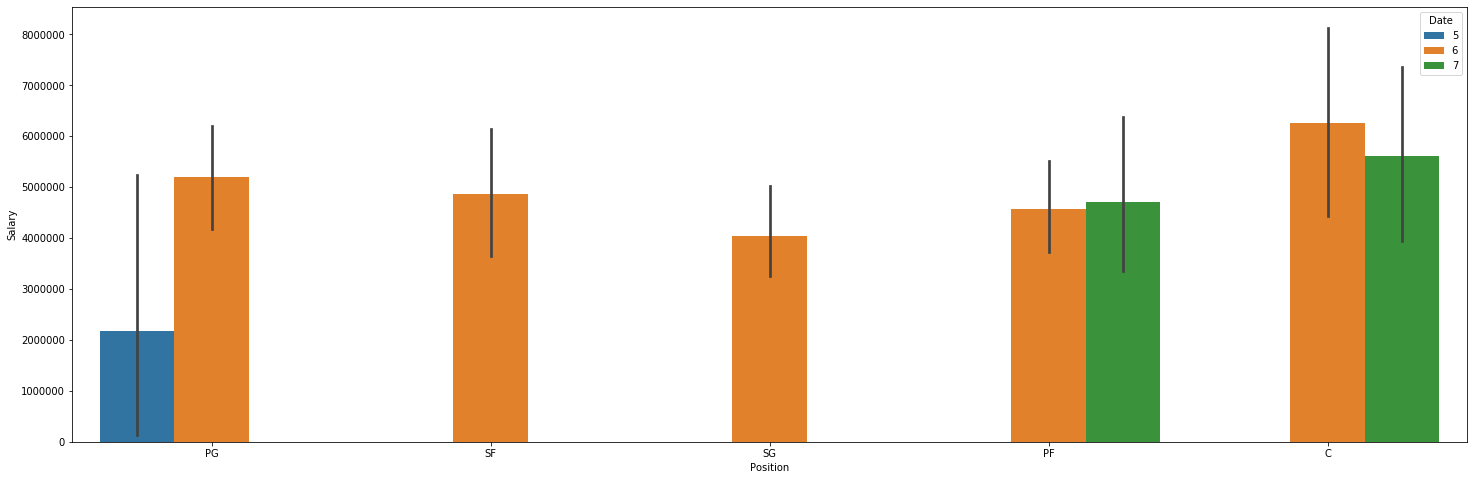

In [18]:
plt.figure(figsize=(25,8))
sns.barplot(hue='Date',y='Salary',x='Position',data=df_s)

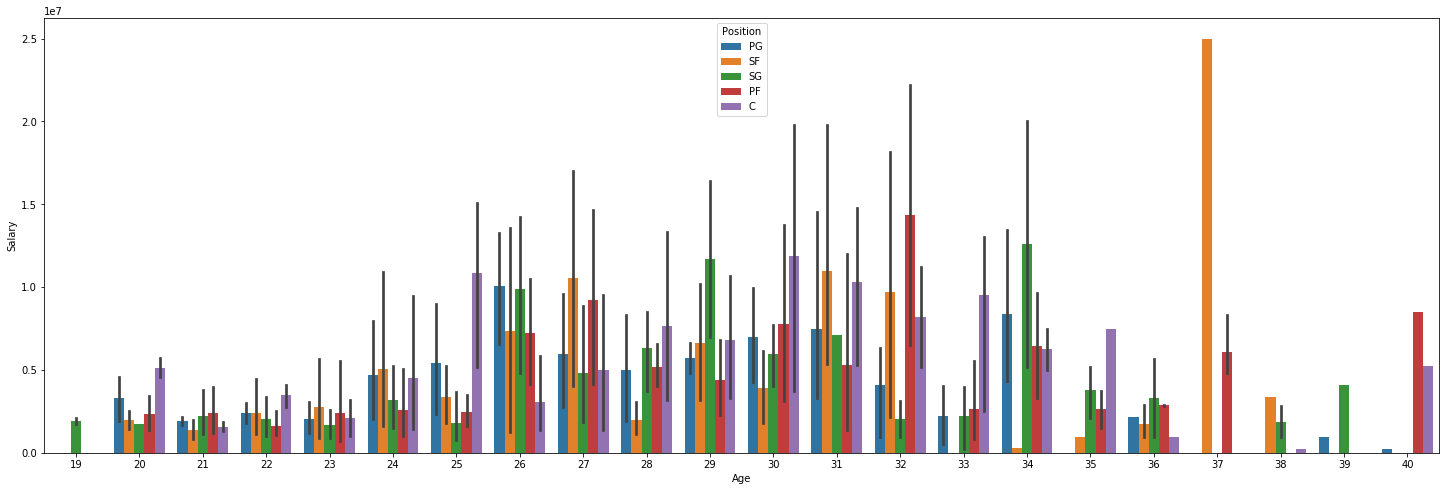

In [19]:
plt.figure(figsize=(25,8))
sns.barplot(x='Age',y='Salary',hue='Position',data=df_s)

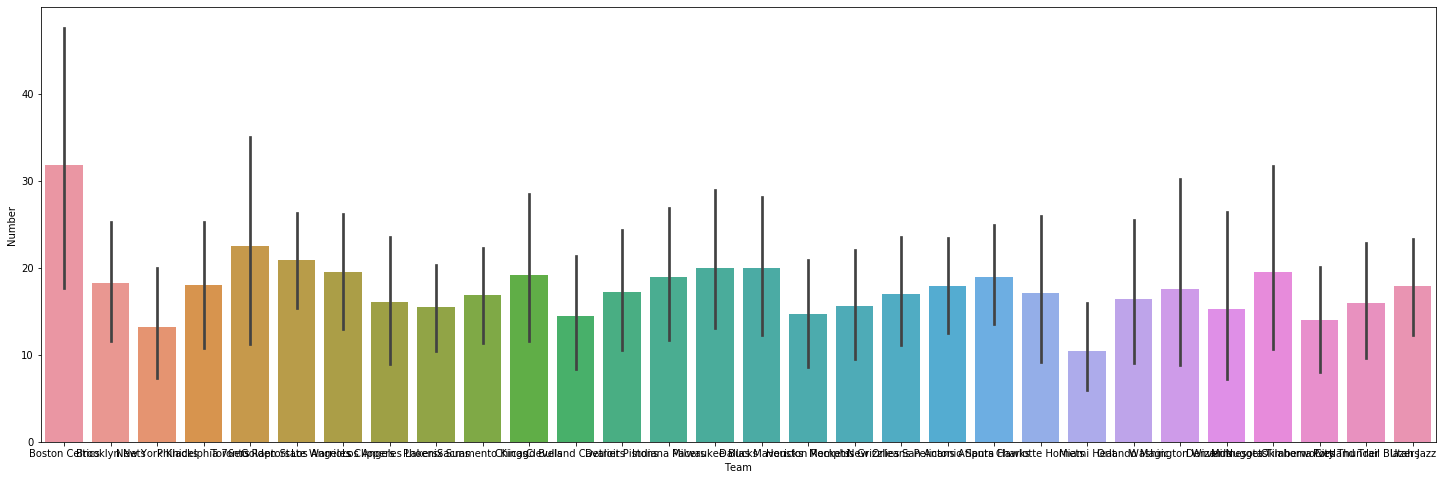

In [20]:
plt.figure(figsize=(25,8))
sns.barplot(x='Team',y='Number',data=df_s)

In [21]:
df_s.drop(['Name','College'],axis=1,inplace=True)

In [22]:
df_s

,Team,Number,Position,Age,Weight,Salary,Month,Date
0,Boston Celtics,0,PG,25,180,7.730337e+06,February,6
1,Boston Celtics,99,SF,25,235,6.796117e+06,June,6
2,Boston Celtics,30,SG,27,205,4.842684e+06,May,6
3,Boston Celtics,28,SG,22,185,1.148640e+06,May,6
4,Boston Celtics,8,PF,29,231,5.000000e+06,October,6
...,...,...,...,...,...,...,...,...
452,Utah Jazz,41,PF,20,234,2.239800e+06,October,6
453,Utah Jazz,8,PG,26,203,2.433333e+06,March,6
454,Utah Jazz,25,PG,24,179,9.000000e+05,January,6
455,Utah Jazz,21,C,26,256,2.900000e+06,March,7


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
m=['Team','Month','Position']
for val in m:
    df_s[val]=le.fit_transform(df_s[val].astype(str))

In [24]:
df_s

,Team,Number,Position,Age,Weight,Salary,Month,Date
0,1,0,2,25,180,7.730337e+06,2,6
1,1,99,3,25,235,6.796117e+06,5,6
2,1,30,4,27,205,4.842684e+06,7,6
3,1,28,4,22,185,1.148640e+06,7,6
4,1,8,1,29,231,5.000000e+06,9,6
...,...,...,...,...,...,...,...,...
452,28,41,1,20,234,2.239800e+06,9,6
453,28,8,2,26,203,2.433333e+06,6,6
454,28,25,2,24,179,9.000000e+05,3,6
455,28,21,0,26,256,2.900000e+06,6,7


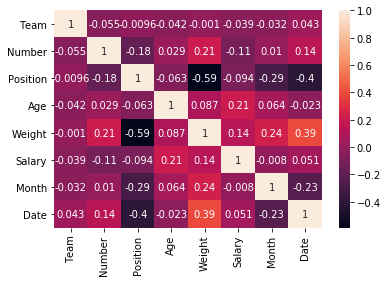

In [25]:
sns.heatmap(df_s.corr(),annot=True)

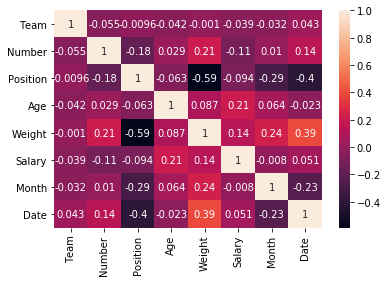

In [27]:
sns.heatmap(df_s.corr(),annot=True)

In [28]:
df_s.skew()

Team       -0.007368
Number      1.668386
Position   -0.014795
Age         0.626349
Weight      0.113788
Salary      1.595511
Month      -0.133609
Date        2.092152
dtype: float64

In [29]:
for col in df_s.columns:
    if df_s.skew().loc[col]>0.55:
        df_s[col]=np.log1p(df_s[col])

In [30]:
df_s.skew()

Team       -0.007368
Number     -0.638011
Position   -0.014795
Age         0.284946
Weight      0.113788
Salary     -0.450091
Month      -0.133609
Date        1.816382
dtype: float64

Team           AxesSubplot(0.125,0.657941;0.227941x0.222059)
Number      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Position    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Age            AxesSubplot(0.125,0.391471;0.227941x0.222059)
Weight      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Salary      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Month             AxesSubplot(0.125,0.125;0.227941x0.222059)
Date           AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

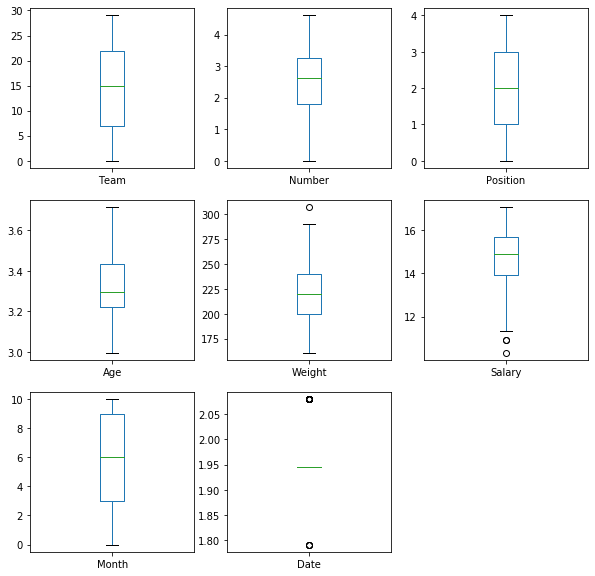

In [31]:
df_s.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

In [32]:
from scipy.stats import zscore
z_score=abs(zscore(df_s))
print(df_s.shape)
df_sfinal=df_s[(z_score<3).all(axis=1)]
print(df_sfinal.shape)

(457, 8)
(450, 8)


In [33]:
df_x=df_s.drop('Position',axis=1)
y=df_s['Position']

In [34]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(data=x,columns=df_x.columns)

In [35]:
x

,Team,Number,Age,Weight,Salary,Month,Date
0,-1.573667,-2.459036,-0.389899,-1.576454,0.888227,-1.102614,-0.258236
1,-1.573667,2.051630,-0.389899,0.511666,0.780622,-0.171201,-0.258236
2,-1.573667,0.904481,0.092158,-0.627308,0.497506,0.449742,-0.258236
3,-1.573667,0.839158,-1.187402,-1.386625,-0.704601,0.449742,-0.258236
4,-1.573667,-0.306901,0.540943,0.359803,0.524214,1.070684,-0.258236
...,...,...,...,...,...,...,...
452,1.568829,1.201931,-1.779155,0.473701,-0.146688,1.070684,-0.258236
453,1.568829,-0.306901,-0.144406,-0.703240,-0.077450,0.139270,-0.258236
454,1.568829,0.732200,-0.645022,-1.614420,-0.908398,-0.792143,-0.258236
455,1.568829,0.568574,-0.144406,1.308949,0.069127,0.139270,2.985473


In [36]:
y

0      2
1      3
2      4
3      4
4      1
      ..
452    1
453    2
454    2
455    0
456    0
Name: Position, Length: 457, dtype: int32

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [38]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6039603960396039
[[11  5  0  1  0]
 [ 3 11  0  7  1]
 [ 0  0 14  0  4]
 [ 0  6  1  4  6]
 [ 0  0  5  1 21]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        17
           1       0.50      0.50      0.50        22
           2       0.70      0.78      0.74        18
           3       0.31      0.24      0.27        17
           4       0.66      0.78      0.71        27

    accuracy                           0.60       101
   macro avg       0.59      0.59      0.59       101
weighted avg       0.59      0.60      0.59       101



In [58]:
def alg(alg,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        a_scr=accuracy_score(y_test,pred)
        #print("r2 score corresponding to",r_state,"is ",r2_scr)
        if a_scr>max_r_score:
            max_r_score=a_scr
            final_r_state=r_state
    print()
    print()
    print("max score",alg," corresponding to",final_r_state,"is ",max_r_score)
    return final_r_state

In [59]:
models = [SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]
for i in models:
    alg(i,x,y)



max score SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)  corresponding to 53 is  0.6847826086956522


max score KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')  corresponding to 76 is  0.6521739130434783


max score DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  correspondi

## Checking for best parameters

In [41]:
tree_para = {'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtc=DecisionTreeClassifier()
dtg = GridSearchCV(dtc, tree_para, cv=5)
dtg.fit(x,y)
print("Best parameters for DecisionTreeClassifier ")
dtg.best_params_

Best parameters for DecisionTreeClassifier 


{'criterion': 'gini', 'max_depth': 7}

In [50]:
svc=SVC()
param = {'kernel':['poly','rbf','linear']}
gsvc = GridSearchCV(svc,param, cv=5)
gsvc.fit(x,y)
print("Best parameters for SVC ")
gsvc.best_params_

Best parameters for SVC 


{'kernel': 'linear'}

In [43]:
neighnors={"n_neighbors":range(1,30)}
knn=KNeighborsClassifier()
gknr=GridSearchCV(knn,neighnors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 24}

### selecting best parameters finding the high accuracy score

In [52]:
svc=SVC(kernel='linear')
alg(svc,x,y)
print()
print()
print("mean score for SVC",cross_val_score(svc,x,y,cv=5,scoring="accuracy").mean())
print("STD score for SVC",cross_val_score(svc,x,y,cv=5,scoring="accuracy").std())



max r2 score SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)  corresponding to 53 is  0.6956521739130435


mean score for SVC 0.5843764930721452
STD score for SVC 0.05032133406157524


In [54]:
dtc=DecisionTreeClassifier(criterion='gini', max_depth=7)
alg(dtc,x,y)
print()
print()
print("mean score for SVC",cross_val_score(dtc,x,y,cv=5,scoring="accuracy").mean())
print("STD score for SVC",cross_val_score(dtc,x,y,cv=5,scoring="accuracy").std())



max r2 score DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  corresponding to 72 is  0.6739130434782609


mean score for SVC 0.6151696129957
STD score for SVC 0.06203445329094569


In [55]:
knn=KNeighborsClassifier(n_neighbors=24)
alg(knn,x,y)
print()
print()
print("mean score for SVC",cross_val_score(knn,x,y,cv=5,scoring="accuracy").mean())
print("STD score for SVC",cross_val_score(knn,x,y,cv=5,scoring="accuracy").std())



max r2 score KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')  corresponding to 73 is  0.6304347826086957


mean score for SVC 0.5274486383182035
STD score for SVC 0.03343017220873674


## SVC is giving best result

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=53)
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("accuracy score: ",accuracy_score(pred,y_test))
print("confusion_matrix: \n",confusion_matrix(pred,y_test))
print("classification_report: ",classification_report(pred,y_test))


accuracy score:  0.6956521739130435
confusion_matrix: 
 [[10  1  0  0  0]
 [ 5 21  0  3  0]
 [ 0  0 14  0  6]
 [ 0  3  0  6  0]
 [ 0  0  4  6 13]]
classification_report:                precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.84      0.72      0.78        29
           2       0.78      0.70      0.74        20
           3       0.40      0.67      0.50         9
           4       0.68      0.57      0.62        23

    accuracy                           0.70        92
   macro avg       0.67      0.71      0.68        92
weighted avg       0.72      0.70      0.70        92



In [57]:
from sklearn.externals import joblib
joblib.dump(svc,"svc.salary.pkl")

['svc.salary.pkl']